Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8596 - loss: 0.4912
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9556 - loss: 0.1521
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9681 - loss: 0.1061
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9736 - loss: 0.0851
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9763 - loss: 0.0736
313/313 - 0s - 1ms/step - accuracy: 0.9764 - loss: 0.0758



Test accuracy: 0.9764000177383423
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


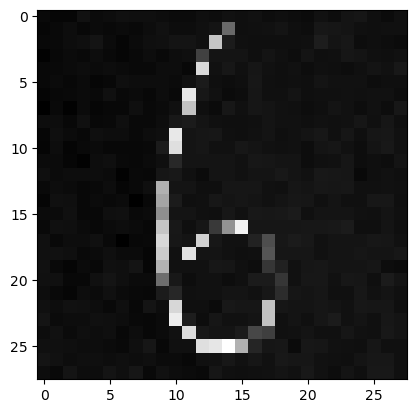

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# Load the MNIST dataset, a collection of handwritten digits
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize pixel values to be in the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0
# Build the neural network model
model = keras.models.Sequential([
layers.Flatten(input_shape=(28, 28)),
layers.Dense(128, activation='relu'),
layers.Dropout(0.2),
layers.Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',

loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)
# Save the model
model.save("handwritten_digit_recognition_model.h5")
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = load_model("handwritten_digit_recognition_model.h5")
# Load an example image (you can replace this with your own image)
image_path = "D:/number.jpg"
image = tf.keras.preprocessing.image.load_img(image_path,
                                              color_mode="grayscale",
                                              target_size=(28, 28))

input_data = tf.keras.preprocessing.image.img_to_array(image)
input_data = input_data / 255.0 # Normalize the pixel values
# Make a prediction on the input data
prediction = model.predict(np.array([input_data]))
# Get the predicted digit (the class with the highest probability)
predicted_digit = np.argmax(prediction)
# Display the image and the predicted digit
plt.imshow(input_data.reshape(28, 28), cmap="binary")
plt.show()